In [1]:
import matplotlib.pyplot as plt
import SQL_example as sqllib
import numpy as np
from scipy.ndimage import gaussian_filter
import dataproc

In [6]:
date_1 = '20240101'
date_2 = '20240102'

date1 = '20240306'
date2 = '20240307'
date3 = '20240308'
date4 = '20240309'
serial = '312'

ldata1 = sqllib.loadLabelledData(serial, date1)
ldata2 = sqllib.loadLabelledData(serial, date2)
ldata3 = sqllib.loadLabelledData(serial, date3)
ldata4 = sqllib.loadLabelledData(serial, date4)

ldata_1 = sqllib.loadLabelledData(serial, date_1)
ldata_2 = sqllib.loadLabelledData(serial, date_2)


Labelled data from device #312 on 20240306 successfully loaded.
1439 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Labelled data from device #312 on 20240307 successfully loaded.
1441 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Labelled data from device #312 on 20240308 successfully loaded.
1439 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Labelled data from device #312 on 20240309 successfully loaded.
1441 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Labelled data from device #312 on 20240101 successfully loaded.
1061 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Labelled data from device #312 on 20240102 successfully loaded.
1358 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]



In [3]:
d1 = [[], [], [], []]
d2 = [[], [], [], []]
d3 = [[], [], [], []]
d4 = [[], [], [], []]

for i in range(min([len(ldata1), len(ldata2), len(ldata3), len(ldata4)])):
    if ldata1[i][-1] != -1:
        d1[0].append(ldata1[i][0])
        d1[1].append(ldata1[i][2])
        d1[2].append(ldata1[i][3])
        d1[3].append(ldata1[i][4])
    if ldata2[i][-1] != -1:
        d2[0].append(ldata2[i][0])
        d2[1].append(ldata2[i][2])
        d2[2].append(ldata2[i][3])
        d2[3].append(ldata2[i][4])
    if ldata3[i][-1] != -1:
        d3[0].append(ldata3[i][0])
        d3[1].append(ldata3[i][2])
        d3[2].append(ldata3[i][3])
        d3[3].append(ldata3[i][4])
    if ldata4[i][-1] != -1:
        d4[0].append(ldata4[i][0])
        d4[1].append(ldata4[i][2])
        d4[2].append(ldata4[i][3])
        d4[3].append(ldata4[i][4])

d_1 = [[], [], [], []]
d_2 = [[], [], [], []]
for i in range(len(ldata_1)):
    if ldata_1[i][-1] == 0:
        d_1[0].append(ldata_1[i][0])
        d_1[1].append(ldata_1[i][2])
        d_1[2].append(ldata_1[i][3])
        d_1[3].append(ldata_1[i][4])
for i in range(len(ldata_1)):
    if ldata_2[i][-1] == 0:
        d_2[0].append(ldata_2[i][0])
        d_2[1].append(ldata_2[i][2])
        d_2[2].append(ldata_2[i][3])
        d_2[3].append(ldata_2[i][4])

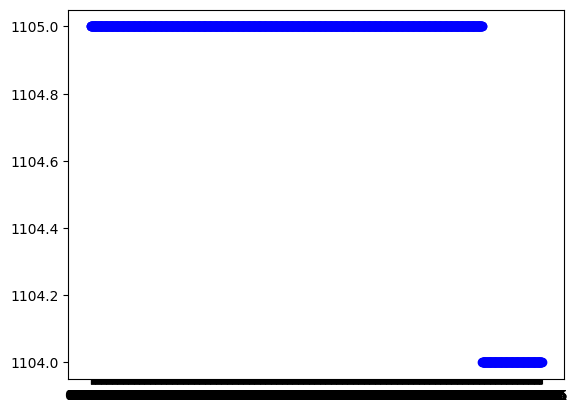

In [5]:
plt.scatter(d_1[0], d_1[1], color='blue', label='Line 1')
#plt.plot(x, max, color='green', label='Line 2')
#plt.plot(x, mean, color='red', label='Line 3')

In [4]:
from scipy import stats

target = d1[1]

# 执行Shapiro-Wilk检验
statistic, p_value = stats.shapiro(target)

# 输出检验结果
print("Shapiro-Wilk检验结果：")
print(f"统计量：{statistic}")
print(f"p值：{p_value}")
if p_value < 0.05:
    print('Non-normal')
else:
    print('Normal')

# 先去除离群值，再检查是否符合正态分布
    
# 如果用线性回归呢？


Shapiro-Wilk检验结果：
统计量：0.3988805168022731
p值：3.323102557731803e-56
Non-normal


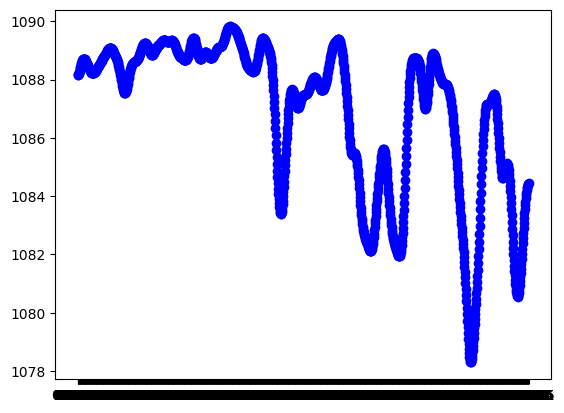

In [7]:
sigma = 10.0
gau_mean1 = gaussian_filter(d1[2], sigma)
plt.scatter(d1[0], gau_mean1, color='blue', label='Line 1')

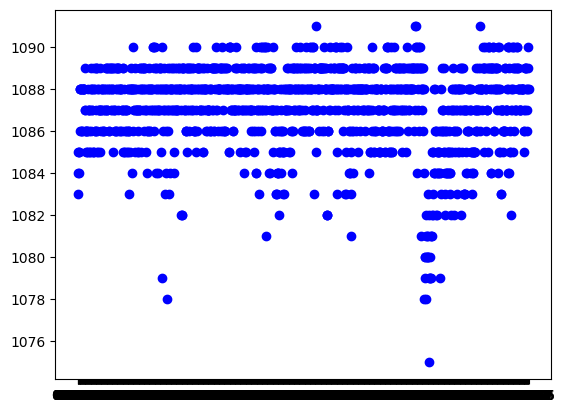

In [7]:
plt.scatter(d2[0], d2[2], color='blue', label='Line 1')
#plt.plot(x, max, color='green', label='Line 2')
#plt.plot(x, mean, color='red', label='Line 3')

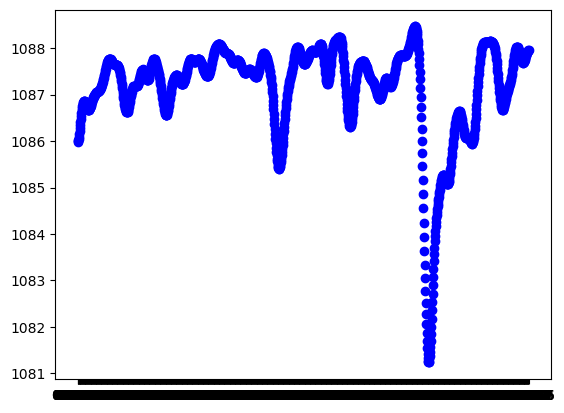

In [9]:
sigma = 10.0
gau_mean2 = gaussian_filter(d2[2], sigma)
plt.scatter(d2[0], gau_mean2, color='blue', label='Line 1')

In [ ]:
import numpy as np

def kalman_filter(measurements, initial_mean, initial_covariance, process_noise, measurement_noise):
    # 初始化状态向量和协方差矩阵
    mean = initial_mean
    covariance = initial_covariance

    filtered_means = []
    filtered_covariances = []

    for measurement in measurements:
        # 预测步骤
        predicted_mean = mean
        predicted_covariance = covariance + process_noise

        # 更新步骤
        measurement_residual = measurement - predicted_mean
        measurement_residual_covariance = predicted_covariance + measurement_noise
        kalman_gain = predicted_covariance / measurement_residual_covariance
        mean = predicted_mean + kalman_gain * measurement_residual
        covariance = (1 - kalman_gain) * predicted_covariance

        filtered_means.append(mean)
        filtered_covariances.append(covariance)

    return filtered_means, filtered_covariances

# 测试示例
measurements = [1.2, 1.7, 2.4, 2.8]  # 测量序列
initial_mean = 0  # 初始状态均值
initial_covariance = 1  # 初始状态协方差
process_noise = 0.1  # 过程噪声方差
measurement_noise = 0.2  # 测量噪声方差

filtered_means, filtered_covariances = kalman_filter(measurements, initial_mean, initial_covariance, process_noise, measurement_noise)

# 打印输出结果
for mean, covariance in zip(filtered_means, filtered_covariances):
    print(f"Mean: {mean}, Covariance: {covariance}")